# Understanding Canadian vehicle emissions and an inventory analysis for a bicycle retailer

## Looking at Automobile CO2 Emissions

### 📖 Background
As a volunteer for a public policy advocacy organization in Canada, our job is to assist a colleague to draft recommendations for guidelines on CO2 emissions rules. 

Our task is to explore which automobiles generate lower emissions after examining emissions data for a wide range of Canadian vehicles.

### The data

#### We have access to seven years of CO2 emissions data for Canadian vehicles ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6))

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

The data comes from the Government of Canada's open data [website](https://open.canada.ca/en).

In [1]:
# Import the pandas, matplotlib and numpy packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
cars = pd.read_csv('data/co2_emissions_canada.csv')

# create numpy arrays
cars_makes = cars['Make'].to_numpy()
cars_models = cars['Model'].to_numpy()
cars_classes = cars['Vehicle Class'].to_numpy()
cars_engine_sizes = cars['Engine Size(L)'].to_numpy()
cars_cylinders = cars['Cylinders'].to_numpy()
cars_transmissions = cars['Transmission'].to_numpy()
cars_fuel_types = cars['Fuel Type'].to_numpy()
cars_fuel_consumption = cars['Fuel Consumption Comb (L/100 km)'].to_numpy()
cars_co2_emissions = cars['CO2 Emissions(g/km)'].to_numpy()

# Preview the dataframe
cars

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


### Challenge I
To help our colleague gain insights on the type of vehicles that have lower CO2 emissions. Include:

1. What is the median engine size in liters?
2. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?  
3. What is the correlation between fuel consumption and CO2 emissions?
4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'? 
5. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?
6. Any other insights you found during your analysis?

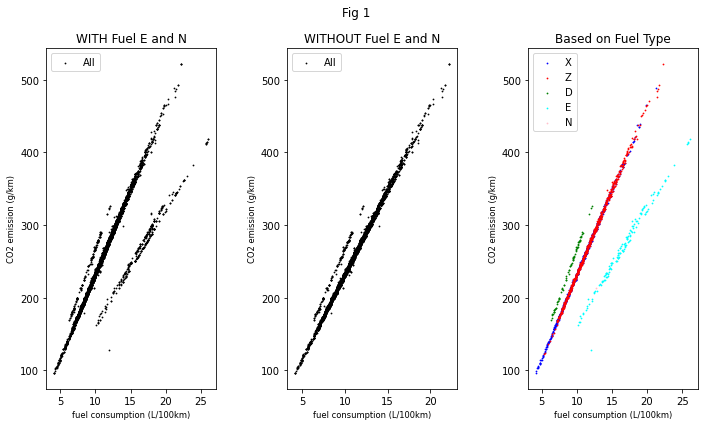

In [2]:
## Define function for plotting
def fuel_emission_scatter(axis, x, y, s, clr, title, xlabel, ylabel, lbl):
    axis.scatter(x, y, s, clr, label=lbl)
    axis.set_title(title)
    axis.set_xlabel(xlabel, fontsize='small')
    axis.set_ylabel(ylabel, fontsize='small')
    axis.legend()
    
## Calculating the median engine size
engine_sizes = np.median(cars_engine_sizes)

## Group by Fuel Type and calculate the average Fuel Consumption of cars of each type
avg_regular_gasoline = cars.groupby('Fuel Type')['Fuel Consumption Comb (L/100 km)'].mean()
avg_regular_gasoline = avg_regular_gasoline.sort_values(ascending=False)

## Correlation between fuel consumption and CO2 emissions
fuelcon_co2emm_corr = np.corrcoef(x=cars_fuel_consumption, y=cars_co2_emissions)
fig1, ax1 = plt.subplots(1, 3, figsize = (10,6))
plt.style.use("default")
plt.suptitle('Fig 1', fontsize = 'large')
fuel_emission_scatter(ax1[0], cars_fuel_consumption, cars_co2_emissions, 0.6, 'black', "WITH Fuel E and N", "fuel consumption (L/100km)","CO2 emission (g/km)", "All")
fig1.tight_layout(w_pad = 4)

## Average CO2 emission per vehicle class
avg_CO2_vehicleclass = cars.pivot_table(values = 'CO2 Emissions(g/km)', index = 'Vehicle Class', aggfunc = 'mean')
avg_CO2_vehicleclass = avg_CO2_vehicleclass.sort_values(by='CO2 Emissions(g/km)', ascending=False)
avg_CO2_vehicleclass = avg_CO2_vehicleclass.reset_index()
avg_CO2_class_SUV_mid = avg_CO2_vehicleclass[avg_CO2_vehicleclass['Vehicle Class'].isin(['SUV - SMALL', 'MID-SIZE'])]
avg_CO2_class_SUV_mid = avg_CO2_class_SUV_mid.set_index('Vehicle Class')
avg_CO2_vehicleclass = avg_CO2_vehicleclass.set_index('Vehicle Class')
# Average CO2 emission for vehicles with engine < 2L
cars_engineL2L = cars[cars['Engine Size(L)'] <= 2]
avg_CO2_engineL2L = cars_engineL2L.pivot_table(values='CO2 Emissions(g/km)', index = 'Model', aggfunc = 'mean')
avg_CO2_engineL2L_10 = avg_CO2_engineL2L.nlargest(10, columns = 'CO2 Emissions(g/km)')

## Some other insights from the analysis
avg_fuelcons_enginesize = cars.pivot_table(values = 'Fuel Consumption Comb (L/100 km)', index = 'Engine Size(L)', aggfunc = 'mean')
avg_CO2emission_enginesize = cars.pivot_table(values = 'CO2 Emissions(g/km)', index = 'Engine Size(L)', aggfunc = 'mean')
avg_fuelcons_enginesize = avg_fuelcons_enginesize.reset_index()
avg_CO2emission_enginesize = avg_CO2emission_enginesize.reset_index()
fuelcons_eng_corr = avg_fuelcons_enginesize['Fuel Consumption Comb (L/100 km)'].corr(avg_fuelcons_enginesize['Engine Size(L)'])
CO2emission_eng_corr = avg_CO2emission_enginesize['CO2 Emissions(g/km)'].corr(avg_CO2emission_enginesize['Engine Size(L)'])

cars_DXZ = cars[~cars['Fuel Type'].isin(['E', 'N'])]
cars_EN = cars[cars['Fuel Type'].isin(['E', 'N'])]
fuel_emission_scatter(ax1[1], cars_DXZ['Fuel Consumption Comb (L/100 km)'], cars_DXZ['CO2 Emissions(g/km)'], 0.6, 'black', "WITHOUT Fuel E and N", "fuel consumption (L/100km)","CO2 emission (g/km)", "All")

avg_CO2_class_fuel = cars.pivot_table(values = 'CO2 Emissions(g/km)', index = ['Fuel Consumption Comb (L/100 km)', 'Vehicle Class'], columns = 'Fuel Type',aggfunc = 'mean')
avg_CO2_class_fuel = avg_CO2_class_fuel.sort_values(by='X')
avg_CO2_class_fuel = avg_CO2_class_fuel.reset_index()
fuel_emission_scatter(ax1[2], avg_CO2_class_fuel['Fuel Consumption Comb (L/100 km)'], avg_CO2_class_fuel['X'], 0.6, 'blue', "Based on Fuel Type", "fuel consumption (L/100km)","CO2 emission (g/km)", "X")
fuel_emission_scatter(ax1[2], avg_CO2_class_fuel['Fuel Consumption Comb (L/100 km)'], avg_CO2_class_fuel['Z'], 0.6, 'red', "Based on Fuel Type", "fuel consumption (L/100km)","CO2 emission (g/km)", "Z")
fuel_emission_scatter(ax1[2], avg_CO2_class_fuel['Fuel Consumption Comb (L/100 km)'], avg_CO2_class_fuel['D'], 0.6, 'green', "Based on Fuel Type", "fuel consumption (L/100km)","CO2 emission (g/km)", "D")
fuel_emission_scatter(ax1[2], avg_CO2_class_fuel['Fuel Consumption Comb (L/100 km)'], avg_CO2_class_fuel['E'], 0.6, 'cyan', "Based on Fuel Type", "fuel consumption (L/100km)","CO2 emission (g/km)", "E")
fuel_emission_scatter(ax1[2], avg_CO2_class_fuel['Fuel Consumption Comb (L/100 km)'], avg_CO2_class_fuel['N'], 0.6, 'pink', "Based on Fuel Type", "fuel consumption (L/100km)","CO2 emission (g/km)", "N")

cars_DXZ_LT180gpkm = cars_DXZ[cars_DXZ['Fuel Consumption Comb (L/100 km)'] < 180]

In [3]:
## Prints all the results of the analysis

print("1. The median engine size among all the cars is", engine_sizes, " L.")
print("-" * 50)
print("2A. The average fuel consumption for each fuel type is: ")
print(avg_regular_gasoline)
print("-" * 50)
print("2B. The average fuel consumption of all vehicles combined is ", np.around(np.mean(avg_regular_gasoline), decimals=2), " L.")
print("-" * 50)
print("3. There is a significantly high degree of correlation between the fuel consumption and CO2 emissions as seen in the correlation matrix below:")
print("")
print(fuelcon_co2emm_corr)
print("")
print("This is also evident from the heatmap (of the correlation matrix) and the scatter plot as seen in Fig 1. The scatter plot shows that fuel consumption and CO2 emissions are directly related to each other with a strong (91.8%) correlation.")
print("-" * 50)
print("4. The average CO2 emission per vehicle class can be seen in the table below: ")
print(avg_CO2_class_SUV_mid)
print(" ")
print("The SUV - Mini consumes slightly more fuel (per 100 km) in comparison to a MID-SIZE car.")
print("-" * 50)
print("5. The average fuel consumption in all vehicles however paints a a different picture: ")
print(avg_CO2_vehicleclass)
print("")
print("The SUV - SMALL and MID-SIZE cars contribute to a much smaller CO2 Emission compared to Passenger Van, Cargo Van, Standard SUV and Standard Pickup Truck which have a CO2 emission greater than 300 g/km.")
print("")
print("However it would be wrong to compare CO2 emission between vehicle classes with different engine characteristics.")
print("Following is a list of the top 10 CO2 emitting cars with an engine size smaller than 2 L.")
print("")
print(avg_CO2_engineL2L_10)
print("")
print("The CO2 emission for cars with an engine size smaller than 2 L are much lesser than cars with large engine capacity.")
print("-" * 50)
print("")
print("6. Further Insights")
print("It would also be interesting to see if cars with larger engines use more fuel. As a result, increased CO2 emissions are predicted as engine size increases.")
print("")
print("According to my findings, there is a strong relationship between fuel consumption and engine size (", np.around(fuelcons_eng_corr * 100, decimals=2), "%).")
print("Furthermore, there is also a strong link between CO2 emissions and engine size (", np.around(CO2emission_eng_corr * 100, decimals=2), "%).")
print("")
print("The fuel type of the car was also investigated to see if it affected CO2 emissions. Cars running on ethanol generally shows higher average fuel consumption however it shows a smaller CO2 footprint (Fig 1). But the plot also shows that there are several non-ethanol vehicles that had smaller fuel consumption (and CO2 footprint as a result). Therefore, it raises a question whether there is any particular reason why there are no ethanol vehicles in the range. So, a comparison with vehicles with engine size smaller than 4 L (cut-off) was attempted but showed no conclusive result (data not shown). However, we can see (Fig 1, far-right) that most of the vehicles that had a CO2 emission smaller than 180 g/km are regular gasoline vehicles.")
print("")
print("The following vehicles operate on ordinary gasoline, premium gasoline, or diesel and emit less than 180 g/km of CO2.:")
print(cars_DXZ_LT180gpkm.groupby('Vehicle Class').agg({"Vehicle Class":"count"}))
print("")
print("And this is the total number of automobiles that operate on ethanol and natural gas each:")
print(cars_EN.groupby('Vehicle Class').agg({"Vehicle Class":"count"}))
plt.show()

1. The median engine size among all the cars is 3.0  L.
--------------------------------------------------
2A. The average fuel consumption for each fuel type is: 
Fuel Type
E    16.861351
N    12.700000
Z    11.422767
X    10.084575
D     8.835429
Name: Fuel Consumption Comb (L/100 km), dtype: float64
--------------------------------------------------
2B. The average fuel consumption of all vehicles combined is  11.98  L.
--------------------------------------------------
3. There is a significantly high degree of correlation between the fuel consumption and CO2 emissions as seen in the correlation matrix below:

[[1.         0.91805157]
 [0.91805157 1.        ]]

This is also evident from the heatmap (of the correlation matrix) and the scatter plot as seen in Fig 1. The scatter plot shows that fuel consumption and CO2 emissions are directly related to each other with a strong (91.8%) correlation.
--------------------------------------------------
4. The average CO2 emission per vehic

### Inference
Based on my analysis, I can conclude that fuel consumption is directly associated with CO2 emissions, with the proviso that emission levels also vary depending on the type of fuel that the automobile uses. Furthermore, larger vehicles, such as vans and standard SUVs, emit the most CO2 from their tailpipes. However, CO2 emissions are not exclusively determined by fuel use, but also by the type of fuel utilised by the vehicle. Ethanol cars normally demand more fuel, but they produce far less CO2 at the same amount of fuel usage. More research is needed to determine why certain ordinary gasoline-powered automobiles utilise far less fuel than the lowest range of ethanol vehicles. It might be due to ethanol vehicles' current technological constraints; it could also be because these ordinary gasoline vehicles (in the lower end of the fuel consumption) fall into a different category than the ethanol vehicles. The sample size of ethanol vehicles is much less than the sample size of conventional fuel vehicles. When compared to conventional fuel vehicles that emit less than 180 g/km CO2, there are much fewer total Compact and Midsize vehicles (which are typically low fuel users) that use ethanol as a fuel source. Backtracing the plot showing ethanol vehicles reveals that when technology advances to the point where ethanol vehicles can be made with lower fuel consumption, CO2 emissions from automobiles can be drastically reduced.


##  SQL - Understanding the bicycle market 

### Background
Our new team leader at our bicycle retail chain, who comes from another industry, requires our assistance in learning about the bicycle market. They must, in particular, better comprehend the brands and categories available in our stores.

###  The data

We have access to the following tables:

#### products
- "product_id" - Product identifier.
- "product_name" - The name of the bicycle.
- "brand_id" - You can look up the brand's name in the "brands" table.
- "category_id" - You can look up the category's name in the "categories" table.
- "model_year" - The model year of the bicycle.
- "list_price" - The price of the bicycle.

#### brands
- "brand_id" - Matches the identifier in the "products" table.
- "brand_name" - One of the nine brands the store sells.

#### categories
- "category_id" - Matches the identifier in the "products" table.
- "category_name" - One of the seven product categories in the store.

### Challenge II
Help your team leader understand your company's products. Include:

1. What is the most expensive item your company sells? The least expensive?
2. How many different products of each category does your company sell?
3. What are the top three brands with the highest average list price? The top three categories?
4. Any other insights you found during your analysis?

In [4]:
/*Table 1: An SQL Query listing distinct brands in each bike category*/
SELECT category_id, COUNT(DISTINCT brand_id) AS count_brand_id, ROUND(AVG(list_price), 2) AS avg_list_price 
FROM products
GROUP BY category_id
ORDER BY avg_list_price DESC;

SyntaxError: invalid syntax (1818226105.py, line 1)

In [ ]:
/*Table 2: An SQL query that lists the distinct categories for each brand*/
SELECT brand_id, COUNT(DISTINCT category_id) AS count_category_id, ROUND(AVG(list_price), 2) AS avg_list_price 
FROM products
GROUP BY brand_id
ORDER BY avg_list_price DESC;

In [ ]:
/*Table 3: SQL Query for maximum and minimum listed price*/
SELECT brand_id, category_id, product_name, list_price
FROM products
 WHERE list_price = 
 (SELECT MAX(list_price) FROM products);
 
SELECT brand_id, category_id, product_name, list_price
FROM products
 WHERE list_price = 
 (SELECT MIN(list_price) FROM products);

In [ ]:
/*Table 4: SQL Query for listing how many products were listed from each category*/
SELECT category_id, COUNT(product_name) AS product_count
FROM products
GROUP BY category_id
ORDER BY product_count DESC;

In [ ]:
/*Table 5: SQL Query to list the average list price of each brand*/
SELECT brand_id, ROUND(AVG(list_price), 2) AS average_list_price
FROM products
GROUP BY brand_id
HAVING ROUND(AVG(list_price), 2) > 761.01
ORDER BY average_list_price DESC;

In [ ]:
/*Table 6: SQL Query listing the category of bikes manufactured by Heller*/
SELECT brand_id, category_id, product_name
FROM products
WHERE brand_id = 3;

In [ ]:
/*Table 7: SQL Query listing Electric Bike brands*/
SELECT category_id, brand_id, product_name
FROM products
WHERE category_id = 5;

In [ ]:
/*Table 8: Querying inventory of bikes from each year*/
SELECT model_year, COUNT(product_name) AS count_products_year
FROM products
GROUP BY model_year;

### Response to challenge questions
1. **Trek Domane SLR 9 Disc - 2018** is the most expensive product **(Table 3)** that is listed in our company's database at USD 11999.99 whereas **Strider Classic 12 Balance Bike - 2018** is the most affordable product listed at just USD 89.99.

2. Our company sells a wide range of products in numerous categories. The **Cruisers Bicycles** (Category 3) category has about 80 bicycles listed **(Table 4)**, followed by **Mountain Bikes** (Category 6), **Road Bikes** (Category 7), and **Children's Bicycles** (Category 1), each with around 60 goods. **Comfort Bicycles** (Category 2) and **Electric Bikes** (Category 5) have a more moderate number of bicycles, with 30 and 24 bicycles, respectively, and Cyclocross Bicycles (Category 4) have the fewest, with only 10 bicycles featured.

3. On average, the top three most expensive brands are Trek, Heller, and Surly **(Table 5)**. The most costly bike Trek Domane SLR 9 Disc - 2018 appears to be from one of these manufacturers as well (Trek). Our company currently owns only three Heller motorcycles, all of them are in the same class **(Table 2)**. **Electric Bikes**, **Road Bikes**, and **Cyclocross Bicycles** are the categories with the highest average list price. There are just three brands available, in the electric bikes category and they are among the most expensive on average, owing to the fact that the majority of bikes in this category are manufactured by Trek, which has the highest average list price among our brands.

4. Looking at the data we can see that our firm currently carries motorcycles that are made between 2016 and 2019, with the majority of bikes being from 2018 (204) **(Table 8)**.